In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style='whitegrid')

df = pd.read_csv('../data/zomato_cleaned.csv')
print(df.shape)

(39581, 7)


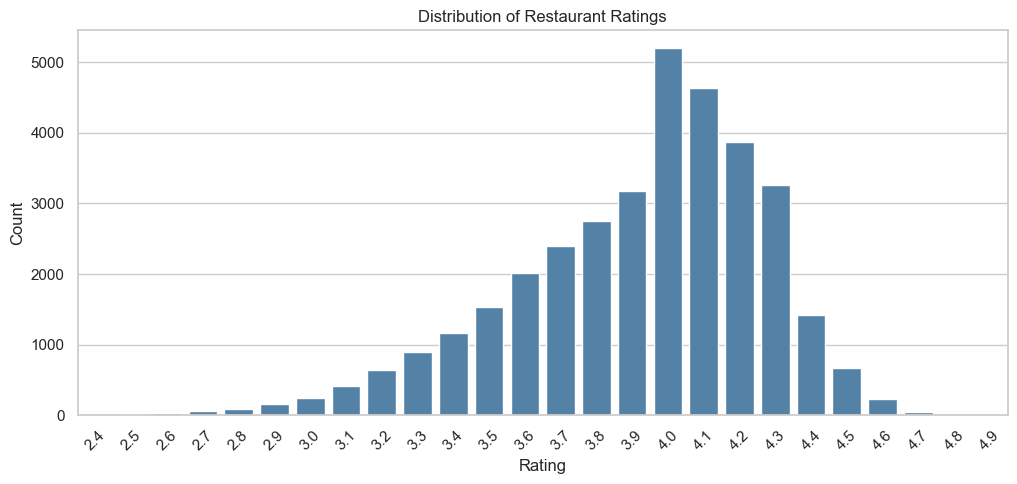

In [4]:
# Rating Distribution
plt.figure(figsize=(12, 5))
rating_counts = df['Rating'].dropna().value_counts().sort_index()
sns.barplot(x=rating_counts.index, y=rating_counts.values, color='steelblue')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('../visuals/rating_distribution.png', bbox_inches='tight')
plt.show()

## Distribution of Restaurant Ratings

- **Tried:** Histogram with KDE → bars offset due to discrete rating values
- **Tried:** Histogram with fixed binrange → still misaligned
- **Final:** Discrete bar plot — each rating value gets its own bar, no gaps or offsets

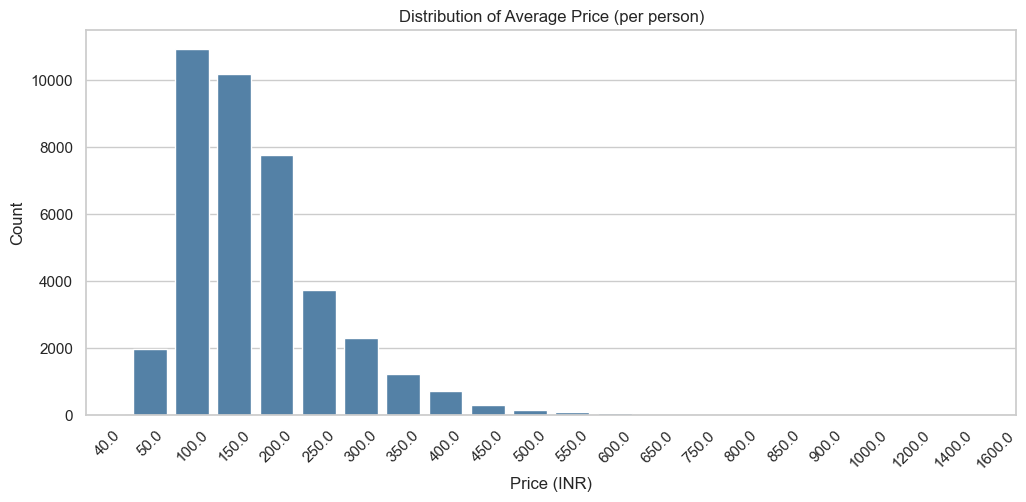

In [6]:
# Price Distribution
plt.figure(figsize=(12, 5))
price_counts = df['Average Price'].dropna().value_counts().sort_index()
sns.barplot(x=price_counts.index, y=price_counts.values, color='steelblue')
plt.title('Distribution of Average Price (per person)')
plt.xlabel('Price (INR)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('../visuals/price_distribution.png', bbox_inches='tight')
plt.show()

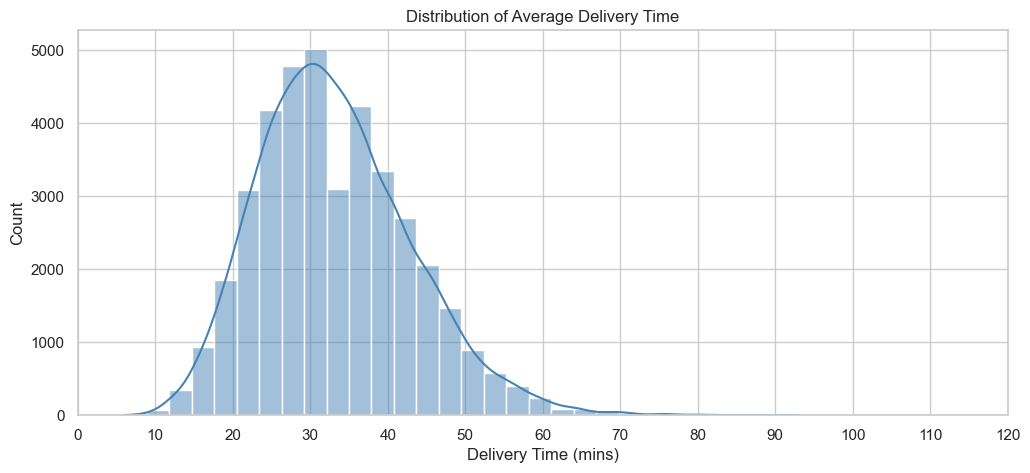

In [8]:
# Delivery Time Distribution
plt.figure(figsize=(12, 5))
sns.histplot(df['Average Delivery Time'].dropna(), bins=30, kde=True, color='steelblue')
plt.title('Distribution of Average Delivery Time')
plt.xlabel('Delivery Time (mins)')
plt.ylabel('Count')
plt.xticks(range(0, 121, 10))
plt.savefig('../visuals/delivery_time_distribution.png', bbox_inches='tight')
plt.show()

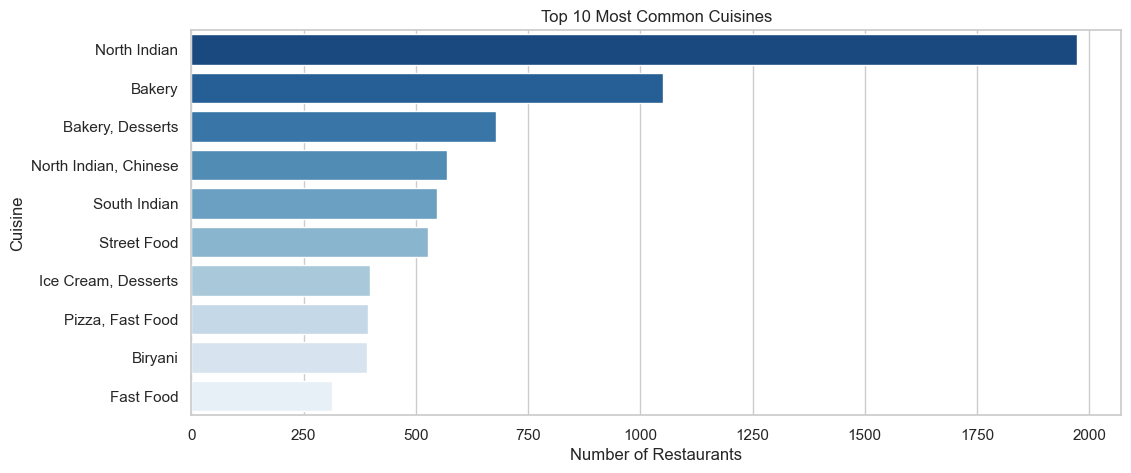

In [9]:
#  Top 10 Cuisines
top_cuisines = df['Cuisine'].value_counts().head(10)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='Blues_r')
plt.title('Top 10 Most Common Cuisines')
plt.xlabel('Number of Restaurants')
plt.savefig('../visuals/top_cuisines.png', bbox_inches='tight')
plt.show()

In [23]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


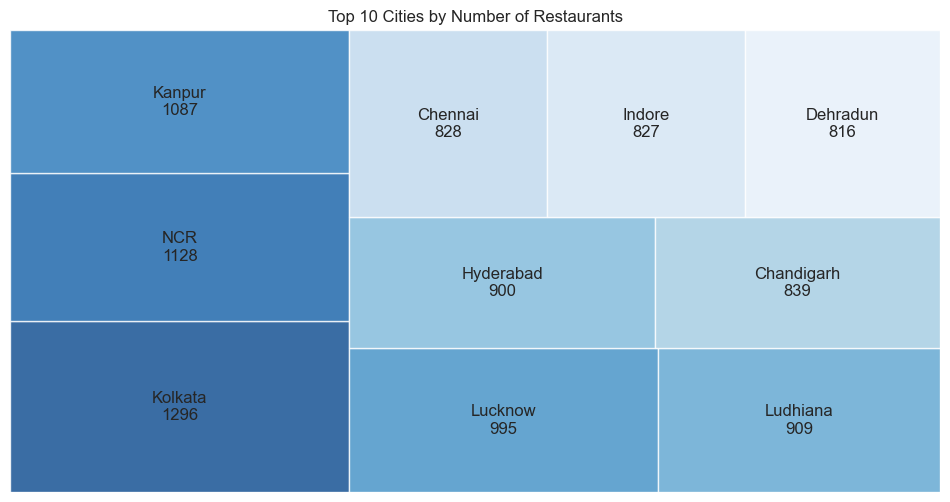

In [24]:
# Top 10 Cities

import squarify

top_cities = df['Location'].value_counts().head(10)
plt.figure(figsize=(12, 6))
squarify.plot(sizes=top_cities.values, 
              label=[f'{city}\n{count}' for city, count in zip(top_cities.index, top_cities.values)],
              color=sns.color_palette('Blues_r', 10),
              alpha=0.8)
plt.title('Top 10 Cities by Number of Restaurants')
plt.axis('off')
plt.savefig('../visuals/top_cities.png', bbox_inches='tight')
plt.show()

##  Top 10 Cities by Restaurant Count

- **Tried:** Horizontal bar chart → functional but plain, bars looked similar in length
- **Final:** Treemap — rectangle size proportional to count, Kolkata dominance clearly visible

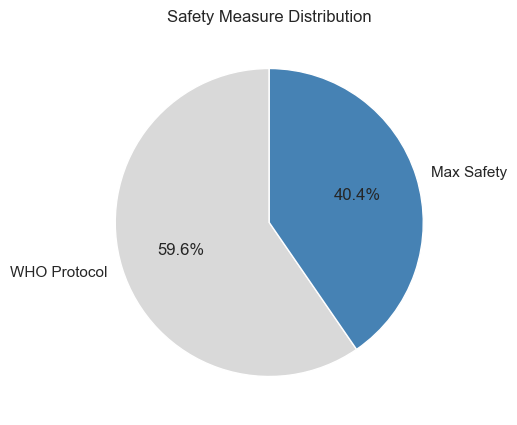

In [11]:
# Safety Measure Distribution
plt.figure(figsize=(6, 5))
df['Safety Measure'].value_counts().plot.pie(
    labels=['WHO Protocol', 'Max Safety'],
    autopct='%1.1f%%',
    colors=['#d9d9d9', 'steelblue'],
    startangle=90)
plt.title('Safety Measure Distribution')
plt.ylabel('')
plt.savefig('../visuals/safety_measure.png', bbox_inches='tight')
plt.show()

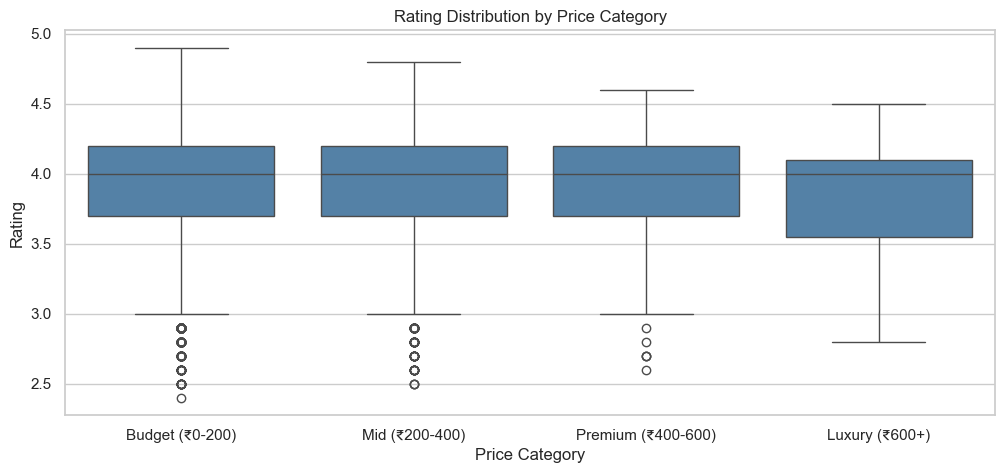

In [14]:
# Price vs Rating
plt.figure(figsize=(12, 5))
df['Price Bucket'] = pd.cut(df['Average Price'], 
                             bins=[0, 200, 400, 600, 1600], 
                             labels=['Budget (₹0-200)', 'Mid (₹200-400)', 'Premium (₹400-600)', 'Luxury (₹600+)'])
sns.boxplot(data=df, x='Price Bucket', y='Rating', color='steelblue')
plt.title('Rating Distribution by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Rating')
plt.savefig('../visuals/price_vs_rating.png', bbox_inches='tight')
plt.show()

##  Price vs Rating

- **Tried:** Bar chart → all bars nearly same height (~3.9–4.0), flat and uninformative
- **Tried:** Scatter plot with regression line → ratings are discrete so dots stacked in columns, looked like a grid
- **Final:** Boxplot with price buckets (Budget/Mid/Premium/Luxury) — shows rating distribution per category clearly

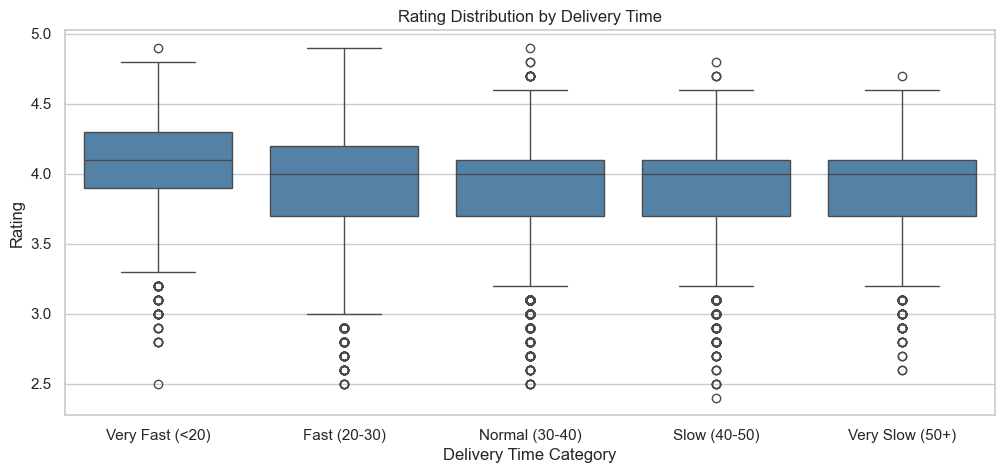

In [16]:
# Delivery Time vs Rating
plt.figure(figsize=(12, 5))
df['Delivery Bucket'] = pd.cut(df['Average Delivery Time'],
                                bins=[0, 20, 30, 40, 50, 120],
                                labels=['Very Fast (<20)', 'Fast (20-30)', 'Normal (30-40)', 'Slow (40-50)', 'Very Slow (50+)'])
sns.boxplot(data=df, x='Delivery Bucket', y='Rating', color='steelblue')
plt.title('Rating Distribution by Delivery Time')
plt.xlabel('Delivery Time Category')
plt.ylabel('Rating')
plt.savefig('../visuals/delivery_vs_rating.png', bbox_inches='tight')
plt.show()

## Delivery Time vs Rating

- **Tried:** Bar chart → too many discrete values, x-axis congested and unreadable
- **Final:** Boxplot with delivery buckets (Very Fast/Fast/Normal/Slow/Very Slow) — clean and shows trend clearly

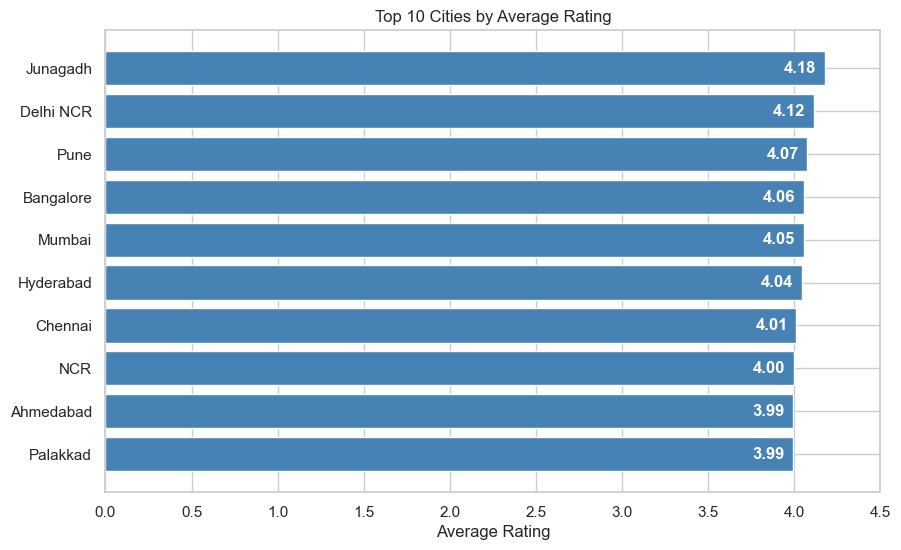

In [21]:
# Top 10 Cities by Average Rating
top_city_ratings = df.groupby('Location')['Rating'].mean().dropna().sort_values(ascending=True).tail(10)
plt.figure(figsize=(10, 6))
bars = plt.barh(top_city_ratings.index, top_city_ratings.values, color='steelblue')
for bar, val in zip(bars, top_city_ratings.values):
    plt.text(val - 0.05, bar.get_y() + bar.get_height()/2, 
             f'{val:.2f}', va='center', ha='right', color='white', fontweight='bold')
plt.title('Top 10 Cities by Average Rating')
plt.xlabel('Average Rating')
plt.xlim(0, 4.5)
plt.savefig('../visuals/city_avg_rating.png', bbox_inches='tight')
plt.show()

## Top 10 Cities by Average Rating

- **Tried:** Horizontal bar chart (x from 0) → all bars looked identical, differences invisible
- **Tried:** Zoomed x-axis bar chart → better but too similar to Cell 6
- **Tried:** Dot plot → too minimal
- **Tried:** Lollipop chart → lines too thin, not clear enough
- **Final:** Horizontal bar chart with value labels printed inside bars — exact differences readable at a glance

# Exploratory Data Analysis — Zomato 2023 India Dataset

## Overview
Performed EDA on 44,724 restaurants across India's top 100 cities covering ratings, 
pricing, delivery time, cuisines, and geographic distribution.

---

## 1. Rating Distribution
- Most restaurants are rated between **3.8–4.2**
- Peak at **4.0** indicating a positive rating bias on Zomato
- 6,960 restaurants (~15.5%) are unrated (New or - status)

## 2. Price Distribution
- Majority of restaurants priced between **₹100–₹300 per person**
- Right skewed — very few luxury restaurants (₹600+)

## 3. Delivery Time Distribution
- Normally distributed with average around **33 minutes**
- Most deliveries fall between 20–45 minutes

## 4. Top Cuisines
- North Indian and Chinese cuisine dominate the platform
- Reflects broad consumer preference across Indian cities

## 5. Top Cities by Restaurant Count
- **Kolkata** has the highest number of restaurants (1,296)
- Followed by NCR (1,128) and Kanpur (1,087)

## 6. Price vs Rating
- **No significant correlation** between price and rating
- All price categories (Budget to Luxury) average around 4.0
- Higher price does not guarantee a better rating

## 7. Delivery Time vs Rating
- Delivery speed has **minimal impact** on customer rating
- All delivery time categories show similar rating distributions

## 8. Top Cities by Average Rating
- **Junagadh** and **Delhi NCR** are the highest rated cities
- Pune and Bangalore follow closely
- Differences between cities are small (all between 4.0–4.2)

---

## Key Insights
- Price and delivery time do not significantly affect ratings
- Ratings are consistently high across the platform suggesting 
  either genuine quality or rating inflation
- North Indian cuisine dominates reflecting India's culinary preferences
- Tier 1 cities dominate in count but not necessarily in rating quality